In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

In [13]:
infile = r'C:\Users\Bhavyashree\Desktop\ML\Logistic_Reg_split_Test\Insurance_data.csv'
df1 = pd.read_csv(infile)
df1.head()


,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


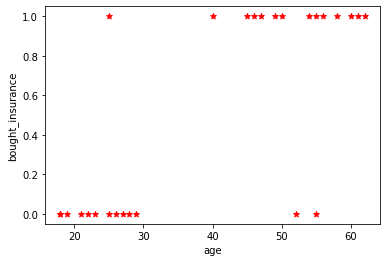

In [17]:
x = df1['age']
y = df1['bought_insurance']
plt.xlabel('age')
plt.ylabel('bought_insurance')
plt.scatter(x,y, color ='red', marker = '*')

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [51]:
x_train, x_test, y_train, y_test = train_test_split(df1[['age']],df1[['bought_insurance']],test_size = 0.2)

In [52]:
y_train

,bought_insurance
3,0
17,1
14,1
13,0
16,1
5,1
21,0
0,0
15,1
9,1


In [25]:
logReg_model = LogisticRegression()

In [53]:
logReg_model.fit(x_train, y_train)

C:\Users\Bhavyashree\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [57]:
x_test

,age
6,55
4,46
23,45
2,47
12,27
25,54


In [58]:
y_test

,bought_insurance
6,0
4,1
23,1
2,1
12,0
25,1


In [59]:
logReg_model.predict(x_test)

array([1, 1, 1, 1, 0, 1], dtype=int64)

In [61]:
logReg_model.score(x_test, y_test)

0.8333333333333334

In [62]:
#Exercise
infile2 = r'C:\Users\Bhavyashree\Desktop\ML\Logistic_Reg_split_Test\HR_comma_sep.csv'
df2 = pd.read_csv(infile2)
df2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [112]:
df3['left'] = df2['left']
df3.head()

<ipython-input-112-97959521fc7b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['left'] = df2['left']


0    1
1    1
2    1
3    1
4    1
Name: left, dtype: object

In [70]:
df4 = df2.drop(['left'],axis = 'columns')
df4.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low


In [71]:
x = df4
y = df3

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
LogReg_model = LogisticRegression()

In [75]:
from sklearn.preprocessing import LabelEncoder

In [76]:
label = LabelEncoder()

In [85]:
df4['Department'] = label.fit_transform(df4.Department)
df4['salary'] = label.fit_transform(df4.salary)

In [86]:
df4.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,0,7,1
1,0.80,0.86,5,262,6,0,0,7,2
2,0.11,0.88,7,272,4,0,0,7,2
3,0.72,0.87,5,223,5,0,0,7,1
4,0.37,0.52,2,159,3,0,0,7,1


In [88]:
LogReg_model.fit(df4, df3)

LogisticRegression()

In [90]:
LogReg_model.score(df4, df3)

0.7667844522968198

In [92]:
LogReg_model.predict([[0.11,0.88,7,272,4,0,0,7,2]])

array([1], dtype=int64)

In [97]:
a = [0.83,0.57,4,232,3,0,0,7,2]
LogReg_model.predict([a])

array([0], dtype=int64)

In [98]:
LogReg_model.score(df4, df3)

0.7667844522968198

In [99]:
import matplotlib.pyplot as plt

<BarContainer object of 14999 artists>

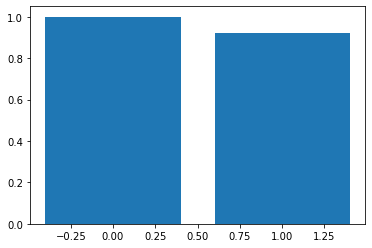

In [104]:
plt.bar(df3,df4.satisfaction_level, label = 'satisfaction_level')

In [105]:
plt.show()

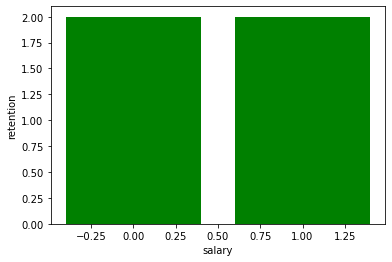

In [108]:
plt.xlabel('salary')
plt.ylabel('retention')

plt.bar(df3,df4.salary, color = 'green')
#plt.legend()
plt.show()

AttributeError: 'Series' object has no attribute 'left'

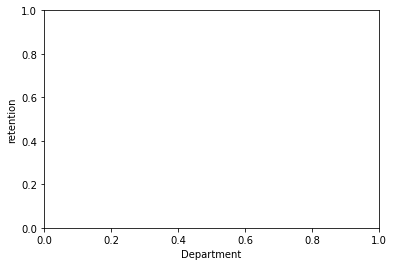

In [110]:
plt.xlabel('Department')
plt.ylabel('retention')
plt.bar(df3.left,df4.Department, color = 'red')
plt.show()

In [111]:
df3.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64